# Homework 2 on Logistic Regression

This implementation of the logistic regression is the same as what you have leraned in the class. Therefore, it is important that you become familiar with every single line of the codes and know its meaning.

However, this code does not use any basis function and does not use the Hessian matrix but a fixed learning ratio in the gradient descent method to train.

Task 1. Know the meaning of this implementation in the line-by-line manner.

Task 2. Enhance in a whatever way you want, e.g., implementing a basis function, implementing another optimizer instead of the gradient descent.

Submit a report for Task 2 only. Describe how you updated the codes and its decision boundary visualization (see the Plotting the decision boundary section). If you applied a basis function, draw the decision boundary in the space spanned by the bases.

### Load the Data and Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [ ]:
import pandas as pd
import io
from google.colab import files

uploaded = files.upload()
data=pd.read_csv("data.csv",index_col="t")
data.head()

Saving data.csv to data.csv


x1         x2
t                      
0  34.623660  78.024693
0  30.286711  43.894998
0  35.847409  72.902198
1  60.182599  86.308552
1  79.032736  75.344376

In [ ]:
feature = data[["x1", "x2"]].values
class_label = data.index.values

### Visualize the Data

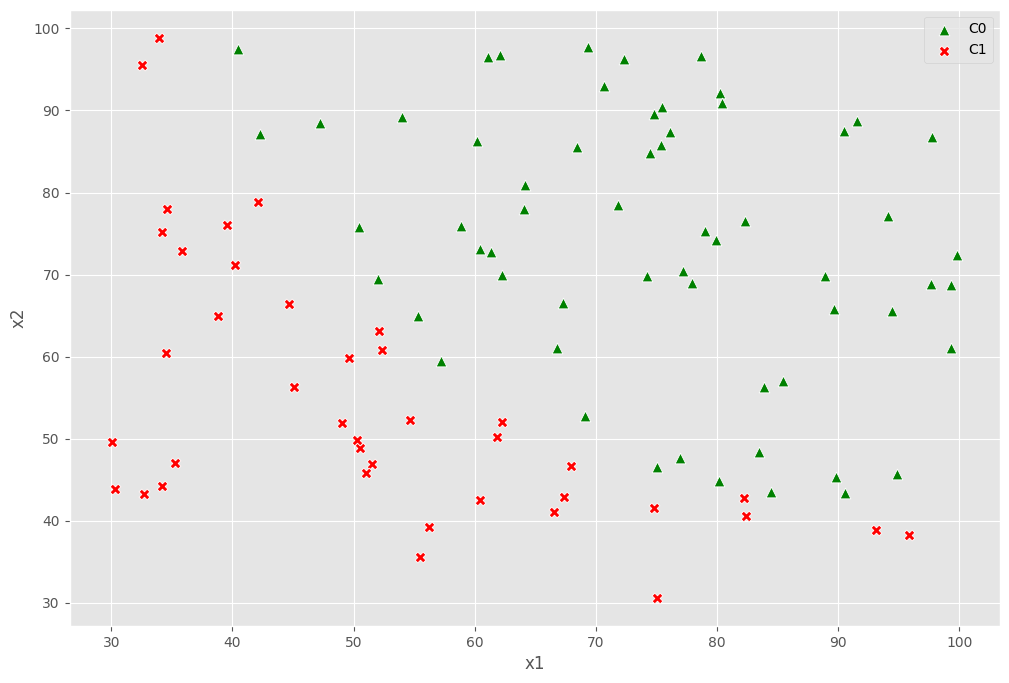

In [ ]:
class_c0 = (class_label == 1).reshape(100, 1)
class_c1 = (class_label == 0).reshape(100, 1)

ax = sns.scatterplot(x = feature[class_c0[:, 0], 0],
                     y = feature[class_c0[:, 0], 1],
                     marker = "^",
                     color = "green",
                     s = 60)
sns.scatterplot(x = feature[class_c1[:, 0], 0],
                y = feature[class_c1[:, 0], 1],
                marker = "X",
                color = "red",
                s = 60)

ax.set(xlabel="x1", ylabel="x2")
ax.legend(["C0", "C1"])
plt.show();

### Define the Logistic Sigmoid Function $\sigma(z)$

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [ ]:
def logistic_function(x):
    return 1/ (1 + np.exp(-x))

### Compute the Cost Function $J(\theta)$ and Gradient

$h_{\boldsymbol \theta}(\boldsymbol x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \boldsymbol \theta^T \boldsymbol x$.

The objective of logistic regression is to minimize the cost function

$$J(\boldsymbol \theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\boldsymbol \theta}(\boldsymbol x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\boldsymbol \theta}(\boldsymbol x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\boldsymbol \theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\boldsymbol \theta}(\boldsymbol x^{(i)}) - y^{(i)})\boldsymbol x_j^{(i)}.$$

In [ ]:
def compute_cost(theta, x, y):
    m = len(y)
    y_pred = logistic_function(np.dot(x , theta))
    error = (y * np.log(y_pred)) + ((1 - y) * np.log(1 - y_pred))
    cost = -1 / m * sum(error)
    gradient = 1 / m * np.dot(x.transpose(), (y_pred - y))
    return cost[0] , gradient

### Cost and Gradient at Initialization

In [ ]:
mean_scores = np.mean(feature, axis=0)
std_scores = np.std(feature, axis=0)
scores = (feature - mean_scores) / std_scores #standardization

rows = feature.shape[0]
cols = feature.shape[1]

X = np.append(np.ones((rows, 1)), scores, axis=1) #include intercept
y = class_label.reshape(rows, 1)

theta_init = np.zeros((cols + 1, 1))
cost, gradient = compute_cost(theta_init, X, y)

print("Cost at initialization", cost)
print("Gradient at initialization:", gradient)

Cost at initialization 0.693147180559946
Gradient at initialization: [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


### Gradient Descent

Minimize the cost function $J(\boldsymbol \theta)$ by updating the below equation and repeat until convergence:
$\boldsymbol \theta_{j+1} := \boldsymbol \theta_j - \alpha \frac{\partial J(\boldsymbol \theta)}{\partial \boldsymbol \theta_j}$.

See https://en.wikipedia.org/wiki/Gradient_descent.

In [ ]:
def gradient_descent(x, y, theta, alpha, iterations):
    costs = []
    for i in range(iterations):
        cost, gradient = compute_cost(theta, x, y)
        theta -= (alpha * gradient)
        costs.append(cost)
    return theta, costs

In [ ]:
theta, costs = gradient_descent(X, y, theta_init, 1, 200)

In [ ]:
print("Theta after running gradient descent:", theta)
print("Resulting cost:", costs[-1])

Theta after running gradient descent: [[1.50850586]
 [3.5468762 ]
 [3.29383709]]
Resulting cost: 0.20489382035447343


### Plotting the Convergence of $J(\boldsymbol \theta)$

Plot $J(\boldsymbol \theta)$ against the number of iterations of gradient descent:

In [ ]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of Cost Function over iterations of Gradient Descent");



```
# 코드로 형식 지정됨
```

### Plotting the decision boundary

$h_{\boldsymbol \theta}(\boldsymbol x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \boldsymbol \theta^T \boldsymbol x$

When $h_{\boldsymbol \theta}(\boldsymbol x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\boldsymbol \theta^T \boldsymbol x) \geq 0.5$

$\implies \boldsymbol \theta^T \boldsymbol x \geq 0$ predict class "1"

Hence, $\theta_0 + \theta_1x_1 + \theta_2x_2 = 0$ is the equation for the decision boundary, giving us

$ x_2 = \frac{-(\theta_0+\theta_1x_1)}{\theta_2}$

In [ ]:
sns.scatterplot(x = X[class_c0[:, 0], 1],
                y = X[class_c0[:, 0], 2],
                marker = "^",
                color = "green",
                s = 60)
ax = sns.scatterplot(x = X[class_c1[:, 0], 1],
                    y = X[class_c1[:, 0], 2],
                    marker = "X",
                    color = "red",
                    s = 60)

ax.legend(["C0", "C1"])
ax.set(xlabel="x1", ylabel="x2")

x_boundary = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
y_boundary = -(theta[0] + theta[1] * x_boundary) / theta[2]

sns.lineplot(x = x_boundary, y = y_boundary, color="blue")
plt.show();

### Predictions using the optimized $\theta$ values

In [ ]:
def predict(theta, x):
    results = x.dot(theta)
    return results > 0


In [ ]:
p = predict(theta, X)
print("Training Accuracy:", sum(p==y)[0],"%")

Training Accuracy: 89 %


In [ ]:
test = np.array([50,79])
test = (test - mean_scores)/std_scores
test = np.append(np.ones(1), test)
probability = logistic_function(test.dot(theta))
print("A test sample who x1 = 50 and x2 = 79 will be in the class of C0 in the probability of ",
      np.round(probability[0], 2))

A test sample who x1 = 50 and x2 = 79 will be in the class of C0 in the probability of  0.71
